In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df = pd.read_csv(r"C:\Users\Anchal yadav\OneDrive\Desktop\ML&DL training\Indian Rental House Price\Indian_housing_Delhi_data.csv")
df.head()


,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [3]:
print(df.shape)


(5000, 16)


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   str    
 1   house_size        5000 non-null   str    
 2   location          5000 non-null   str    
 3   city              5000 non-null   str    
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   str    
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    str    
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   str    
 13  description       4715 non-null   str    
 14  SecurityDeposit   5000 non-null   str    
 15  Status            5000 non-null   str    
dtypes: float64(5), int64(1), str(10)
memory usage: 625.1 

In [29]:
df.isnull().sum()

house_type             0
house_size             0
location               0
city                   0
latitude               0
longitude              0
price                  0
currency               0
numBathrooms          25
numBalconies        2263
isNegotiable        4821
priceSqFt           5000
verificationDate       0
description          285
SecurityDeposit        0
Status                 0
dtype: int64

In [11]:
print(df.columns.tolist())



['house_type', 'house_size', 'location', 'city', 'latitude', 'longitude', 'price', 'currency', 'numBathrooms', 'numBalconies', 'isNegotiable', 'priceSqFt', 'verificationDate', 'description', 'SecurityDeposit', 'Status']


In [5]:
df.describe()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt
count,5000.000000,5000.000000,5.000000e+03,4975.000000,2737.000000,0.0
mean,28.578012,77.174499,2.221738e+05,2.918593,1.954330,NaN
std,0.190186,0.115636,2.739843e+05,1.087823,0.547219,NaN
min,20.011379,72.771332,3.000000e+03,1.000000,1.000000,NaN
25%,28.544489,77.138248,2.950000e+04,2.000000,2.000000,NaN
50%,28.569295,77.196472,1.250000e+05,3.000000,2.000000,NaN
75%,28.618687,77.228950,3.011020e+05,4.000000,2.000000,NaN
max,28.805466,80.361313,3.010101e+06,10.000000,8.000000,NaN


In [6]:
df.skew(numeric_only=True)

latitude       -36.113099
longitude      -12.476365
price            2.845386
numBathrooms    -0.087623
numBalconies     1.766754
priceSqFt             NaN
dtype: float64

In [12]:
col = df.columns[0]   # just testing first column
print(df[col].head())



0      1 RK Studio Apartment 
1      1 RK Studio Apartment 
2    2 BHK Independent Floor 
3    3 BHK Independent House 
4            2 BHK Apartment 
Name: house_type, dtype: str


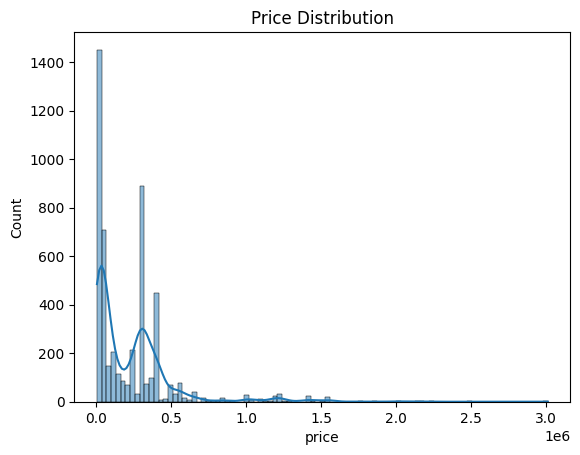

In [32]:
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

# price distribution

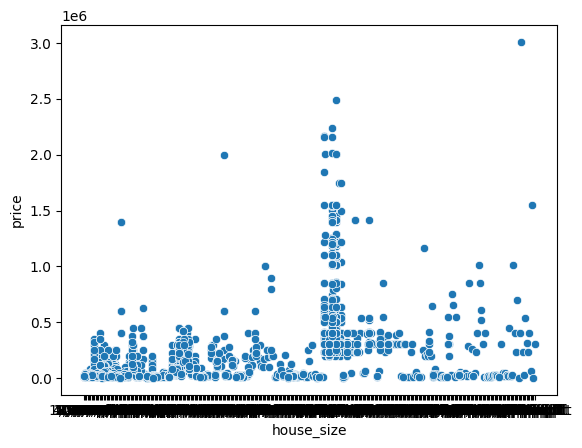

In [33]:
# House Size vs Price
sns.scatterplot(x='house_size', y='price', data=df)
plt.show()


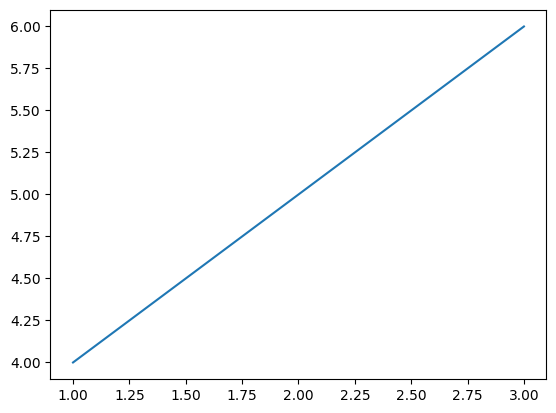

In [34]:
import matplotlib.pyplot as plt
plt.plot([1,2,3],[4,5,6])
plt.show()



In [ ]:
# Data Preprocessing
df = df.drop(['description', 'verificationDate', 'currency'], axis=1, errors='ignore')


In [36]:
df.isnull().sum()


house_type            0
house_size            0
location              0
city                  0
latitude              0
longitude             0
price                 0
numBathrooms         25
numBalconies       2263
isNegotiable       4821
priceSqFt          5000
SecurityDeposit       0
Status                0
dtype: int64

In [37]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


,house_type,house_size,location,city,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,priceSqFt,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,1.0,2.0,Negotiable,NaN,No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,1.0,2.0,Negotiable,NaN,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,1.0,2.0,Negotiable,NaN,No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,3.0,2.0,Negotiable,NaN,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,2.0,2.0,Negotiable,NaN,No Deposit,Unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,4.0,2.0,Negotiable,NaN,"40,10,102",Unfurnished
4996,5 BHK Independent House,"6,521 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1549181,4.0,2.0,Negotiable,NaN,"54,01,015",Unfurnished
4997,3 BHK Independent Floor,"1,855 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301012,3.0,2.0,Negotiable,NaN,"18,18,181",Unfurnished
4998,3 BHK Independent Floor,"2,856 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301011,3.0,2.0,Negotiable,NaN,"10,10,110",Unfurnished


In [ ]:
df = pd.get_dummies(df, drop_first=True)
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
print (X_train, X_test, y_train, y_test)

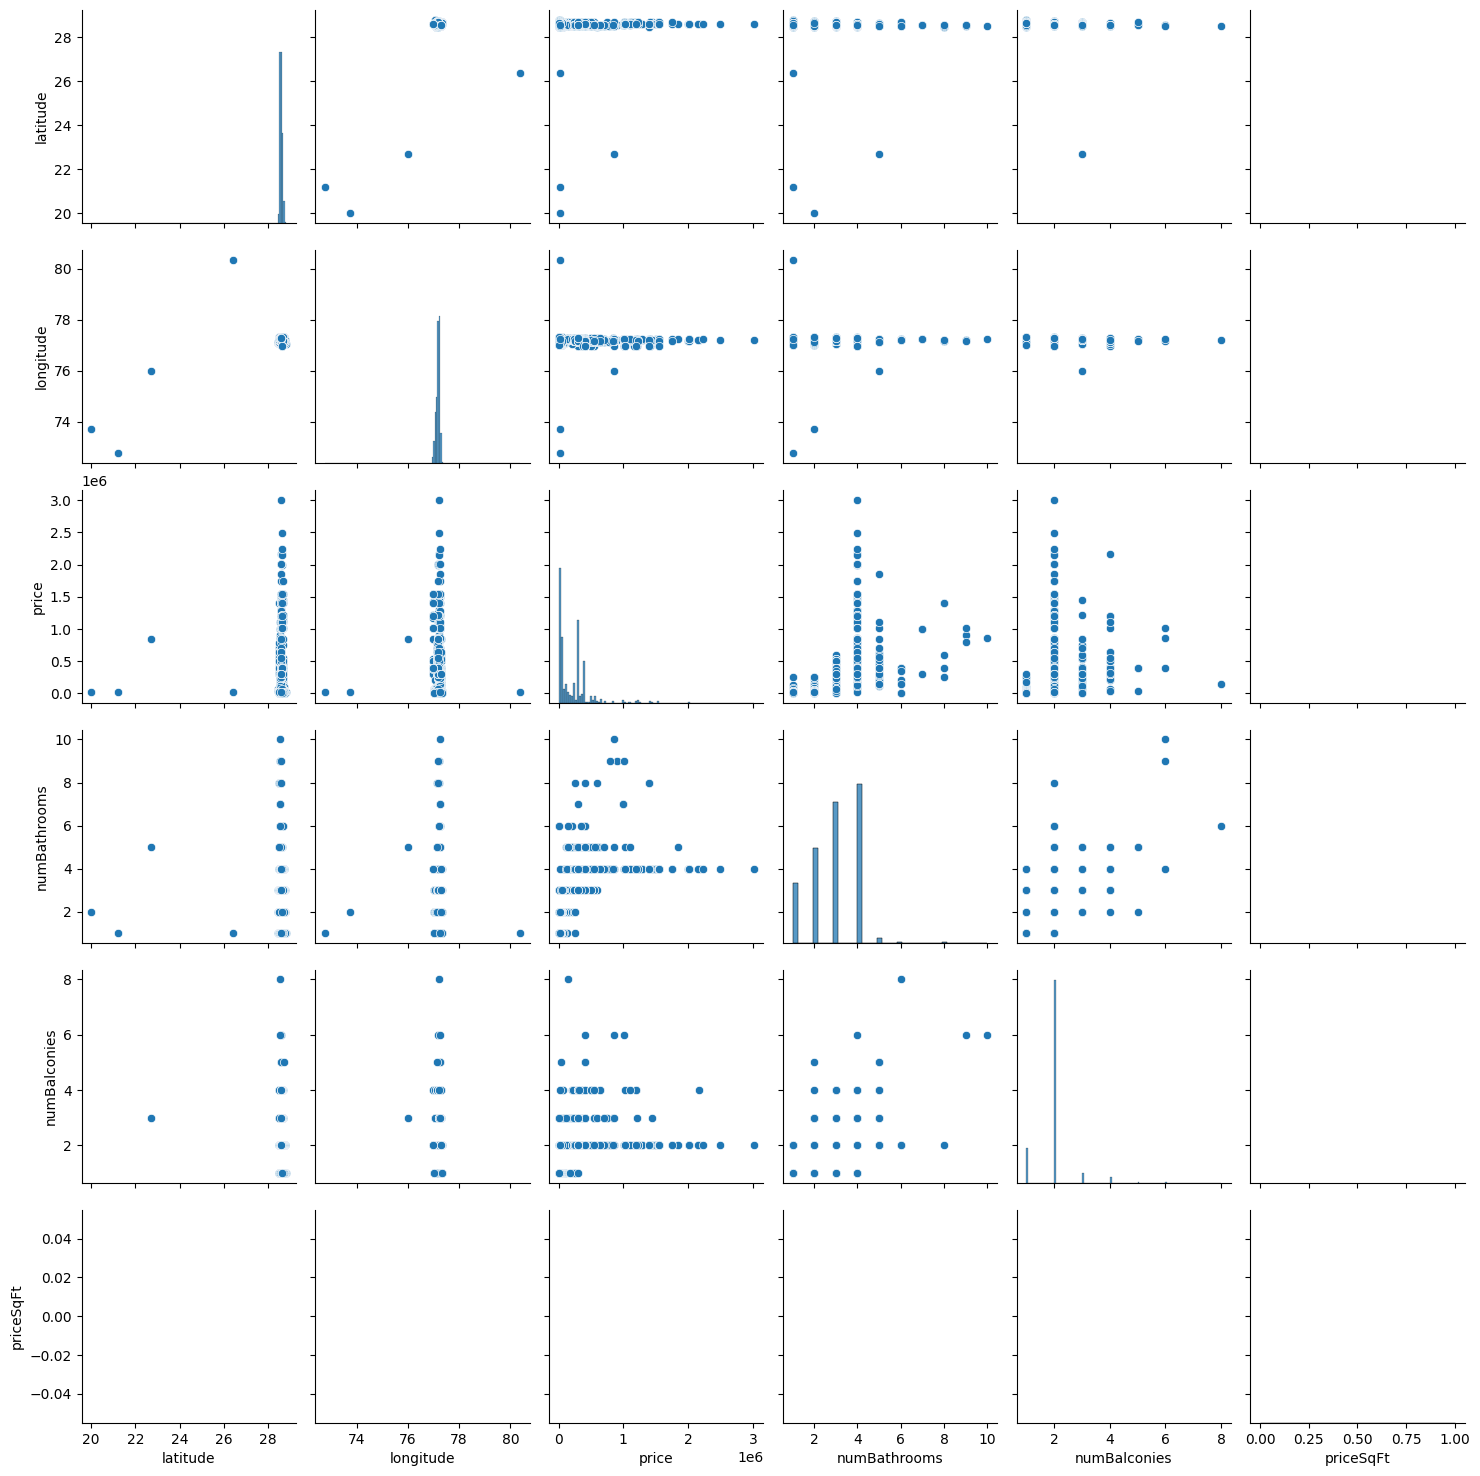

In [4]:
sns.pairplot(df)
plt.show()

In [14]:
df.priceSqFt.value_counts()

Series([], Name: count, dtype: int64)

In [12]:
df['house_size'] = df['house_size'].astype(str).str.extract(r'(\d+)').astype(float)
df[['house_size']].head()
df.info()




<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   str    
 1   house_size        5000 non-null   float64
 2   location          5000 non-null   str    
 3   city              5000 non-null   str    
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   str    
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    str    
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   str    
 13  description       4715 non-null   str    
 14  SecurityDeposit   5000 non-null   str    
 15  Status            5000 non-null   str    
dtypes: float64(6), int64(1), str(9)
memory usage: 625.1 K

In [13]:
df['SecurityDeposit'].value_counts()


SecurityDeposit
No Deposit    2224
 10,10,202     221
 18,10,202      80
 10,20,202      70
 10,10,220      69
              ... 
 7,54,155        1
 20,44,005       1
 15,61,919       1
 45,20,105       1
 54,01,015       1
Name: count, Length: 646, dtype: int64

In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   str    
 1   house_size        5000 non-null   str    
 2   location          5000 non-null   str    
 3   city              5000 non-null   str    
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   str    
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    str    
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   str    
 13  description       4715 non-null   str    
 14  SecurityDeposit   5000 non-null   str    
 15  Status            5000 non-null   str    
dtypes: float64(5), int64(1), str(10)
memory usage: 625.1 

In [9]:
df['house_size'] = (
    df['house_size']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.extract(r'(\d+)')[0]
)

df['house_size'] = pd.to_numeric(df['house_size'], errors='coerce')
print(df[['house_size']].head())
print(df['house_size'].isna().sum())




   house_size
0         400
1         400
2         500
3        1020
4         810
0


In [11]:

df = df.drop(['description','verificationDate','currency','priceSqFt'], axis=1)


In [16]:
X = df.drop('price', axis=1)   # All input features
y = df['price']                # Target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)




(4000, 11)
(1000, 11)
(4000,)
(1000,)


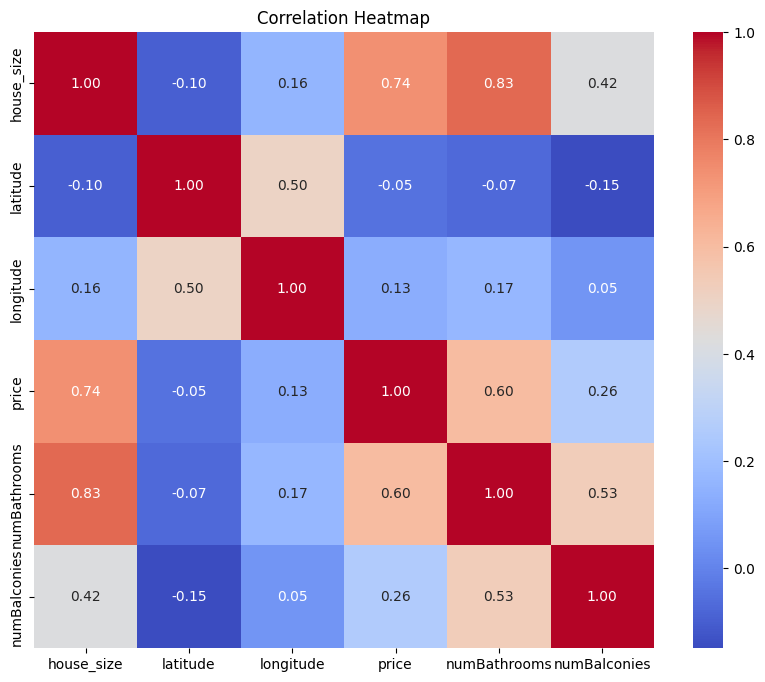

In [17]:
plt.figure(figsize=(10,8))

sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title("Correlation Heatmap")
plt.show()

In [19]:
# Convert
df['SecurityDeposit'] = (
    df['SecurityDeposit']
    .astype(str)
    .str.replace('No Deposit', '0', regex=False)
    .str.replace(',', '', regex=False)
)

df['SecurityDeposit'] = pd.to_numeric(df['SecurityDeposit'], errors='coerce').fillna(0)

# Print output
print(df['SecurityDeposit'].head())
print("Datatype:", df['SecurityDeposit'].dtype)



0    0
1    0
2    0
3    0
4    0
Name: SecurityDeposit, dtype: int64
Datatype: int64


In [ ]:
# Encode Categorical Columns
df['isNegotiable'] = df['isNegotiable'].map({'Negotiable':1, 'Not Negotiable':0})
df['Status'] = df['Status'].map({'Furnished':2, 'Semi-Furnished':1, 'Unfurnished':0})

print("Encoded Columns:")
print(df[['isNegotiable','Status']].head())


Encoded Columns:
   isNegotiable  Status
0           NaN       2
1           NaN       2
2           NaN       1
3           NaN       2
4           NaN       0


In [23]:
# Convert Latitude & Longitude to Proper Type
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

print(df[['latitude','longitude']].dtypes)


latitude     float64
longitude    float64
dtype: object


In [24]:
# Encode Categorical Variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=['house_type', 'location', 'city'], drop_first=True)

print("After Encoding:\n", df.head())


After Encoding:
    house_size   latitude  longitude  price  numBathrooms  numBalconies  \
0         400  28.545561  77.254349  22000           1.0           NaN   
1         400  28.643259  77.132828  20000           1.0           NaN   
2         500  28.618677  77.053352   8500           1.0           NaN   
3        1020  28.712898  77.180000  48000           3.0           NaN   
4         810  28.723539  77.131424  20000           2.0           NaN   

   isNegotiable  SecurityDeposit  Status  house_type_1 BHK Independent Floor   \
0           NaN                0       2                                False   
1           NaN                0       2                                False   
2           NaN                0       1                                False   
3           NaN                0       2                                False   
4           NaN                0       0                                False   

   ...  location_Yojna Vihar  location_Zone L Dwark

In [27]:
# Feature Scaling (Important for ML Models)
scaler = StandardScaler()

scaled_cols = ['house_size', 'SecurityDeposit', 'price']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

print("After Scaling:\n", df[scaled_cols].head())

After Scaling:
    house_size  SecurityDeposit     price
0   -1.191122        -0.665018 -0.730676
1   -1.191122        -0.665018 -0.737977
2   -1.145007        -0.665018 -0.779954
3   -0.905204        -0.665018 -0.635771
4   -1.002047        -0.665018 -0.737977


In [29]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

print("After Outlier Removal:", df.shape)


After Outlier Removal: (4803, 323)


In [ ]:
def preproc_str(s):
    s = s.replace(',', '')
    s = s.replace('No Deposit', '0')
    return s   
df.head() 

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [10]:
def preproc_str(s):
    return int(s.strip().replace(',', '').replace('No Deposit','0').replace(' sq ft',''))

In [12]:
preproc_str('1,020 sq ft')
preproc_str('No Deposit')
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,NaN
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,NaN
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,NaN
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,NaN
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,NaN


In [13]:
df.house_size = df.house_size.apply(preproc_str)

In [14]:
df.SecurityDeposit = df.SecurityDeposit.apply(preproc_str)

In [15]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",0,NaN
1,1 RK Studio Apartment,400,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,0,NaN
2,2 BHK Independent Floor,500,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",0,NaN
3,3 BHK Independent House,1020,Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,0,NaN
4,2 BHK Apartment,810,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,0,NaN


In [20]:
# oe = OrdinalEncoder(encoded_missing_value = df.Status.mode())
ohe = OneHotEncoder()

In [21]:
ohe.fit(df[['Status']])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'error'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_catego

In [22]:
ohe.categories_

[array([nan])]

In [24]:
pd.DataFrame(ohe.transform(df[["Status"]],).toarray(), columns=ohe.get_feature_names_out(['Status'])).head()

,Status_nan
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


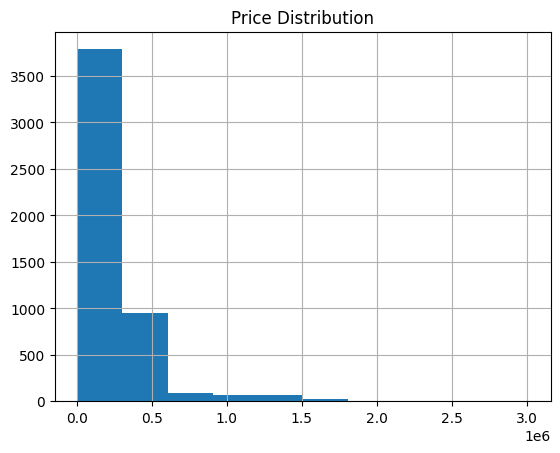

In [27]:
df['price'].hist()
plt.title("Price Distribution")
plt.show()

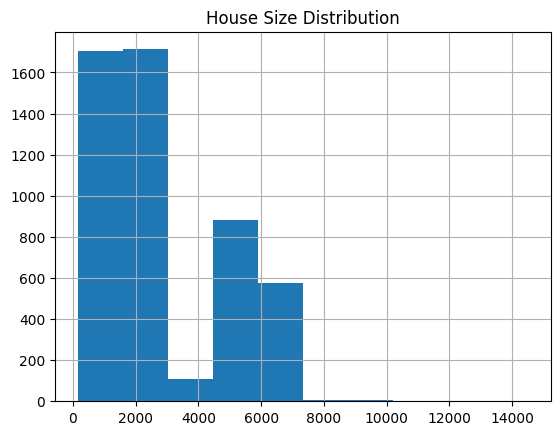

In [28]:
df['house_size'].hist()
plt.title("House Size Distribution")
plt.show()

<Axes: >

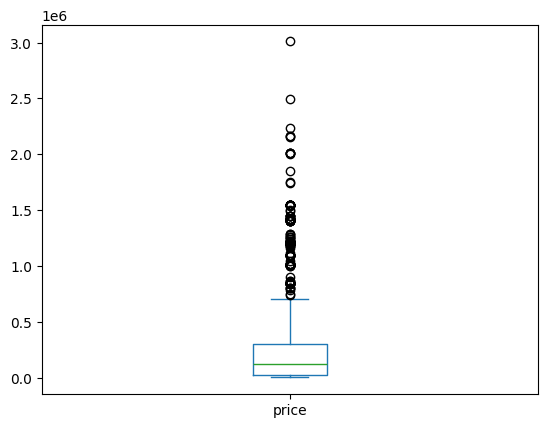

In [32]:
df['price'].plot(kind='box')

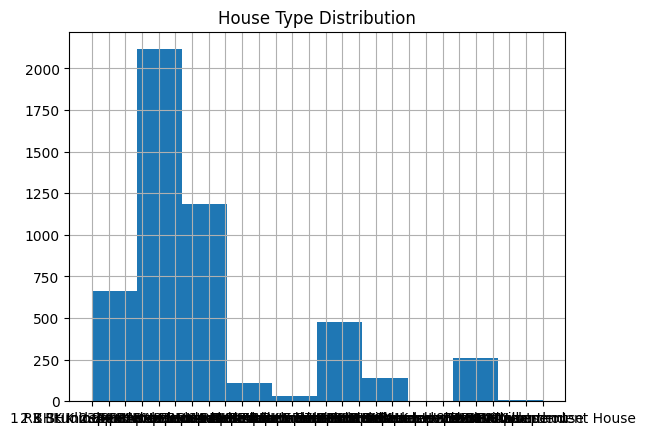

In [29]:
df['house_type'].hist()
plt.title("House Type Distribution")
plt.show()

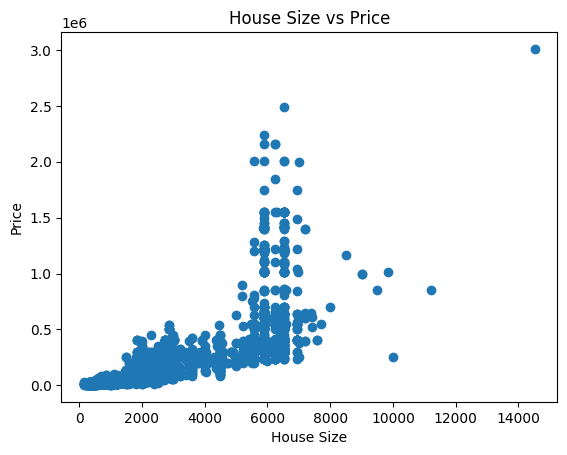

In [30]:
plt.scatter(df['house_size'], df['price'])
plt.title("House Size vs Price")
plt.xlabel("House Size")
plt.ylabel("Price")
plt.show()

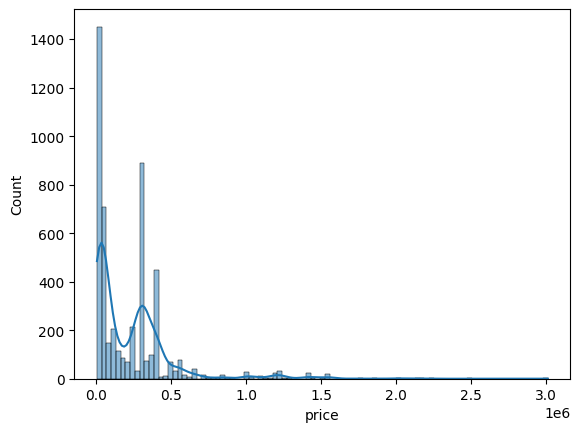

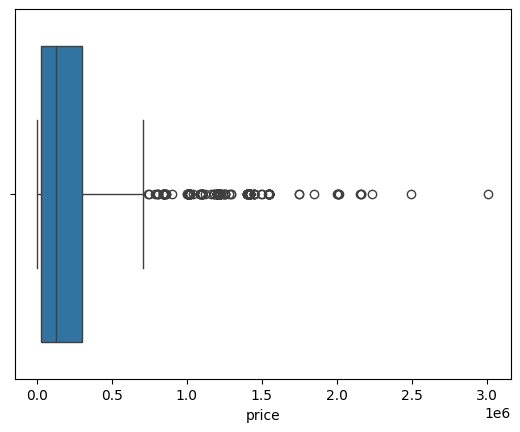

In [7]:
# nnumerical features
sns.histplot(df['price'], kde=True)
plt.show()

sns.boxplot(x=df['price'])
plt.show()


In [10]:
num_df = df.select_dtypes(include=np.number)

corr = num_df.corr()
corr

,house_size,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,price_per_sqft
house_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,1.000000,0.498180,-0.045589,-0.070936,-0.148747,NaN,NaN
longitude,NaN,0.498180,1.000000,0.133261,0.168651,0.049776,NaN,NaN
price,NaN,-0.045589,0.133261,1.000000,0.602053,0.258557,NaN,NaN
numBathrooms,NaN,-0.070936,0.168651,0.602053,1.000000,0.531318,NaN,NaN
numBalconies,NaN,-0.148747,0.049776,0.258557,0.531318,1.000000,NaN,NaN
priceSqFt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_per_sqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Log-Transformed Price Distribution')

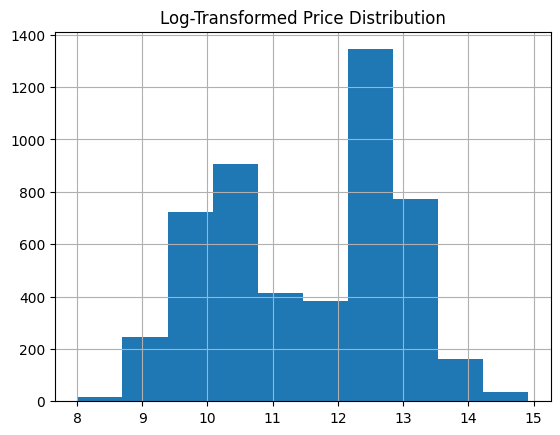

In [13]:
# HK from Size column
df['price_log'] = np.log1p(df['price'])
df['price_log'].hist()
plt.title("Log-Transformed Price Distribution")

In [15]:
# . Log Transform Skewed Target
df['price_log'] = np.log1p(df['price'])
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,price_per_sqft,price_log
0,1 RK Studio Apartment,NaN,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished,NaN,9.998843
1,1 RK Studio Apartment,NaN,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished,NaN,9.903538
2,2 BHK Independent Floor,NaN,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished,NaN,9.047939
3,3 BHK Independent House,NaN,Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished,NaN,10.778977
4,2 BHK Apartment,NaN,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished,NaN,9.903538


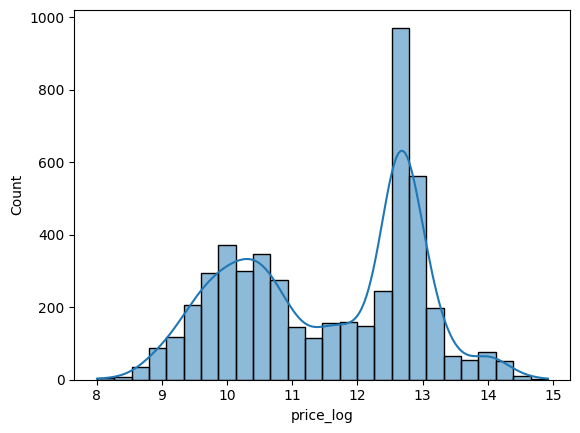

In [16]:
# Visualize Changes
sns.histplot(df['price_log'], kde=True)
plt.show()

In [20]:
print(numeric_cols)
print(len(numeric_cols))


Index(['house_size', 'latitude', 'longitude', 'price', 'numBathrooms',
       'numBalconies', 'priceSqFt', 'price_per_sqft', 'price_log'],
      dtype='str')
9


In [21]:
imputed_array = imputer.fit_transform(df[numeric_cols])

print(imputed_array.shape)


(5000, 6)


c:\Users\Anchal yadav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['house_size' 'priceSqFt' 'price_per_sqft']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [25]:
from sklearn.impute import SimpleImputer

# Drop completely empty columns
df = df.dropna(axis=1, how='all')

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Median imputation
imputer = SimpleImputer(strategy='median')

df[numeric_cols] = pd.DataFrame(
    imputer.fit_transform(df[numeric_cols]),
    columns=numeric_cols,
    index=df.index
)


In [27]:
df = df.dropna(axis=1, how='all')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [31]:
X = df.drop('price', axis=1)
y = df['price']


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [34]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


house_type             0
location               0
city                   0
latitude               0
longitude              0
currency               0
numBathrooms           0
numBalconies           0
isNegotiable        3850
verificationDate       0
description          222
SecurityDeposit        0
Status                 0
price_log              0
dtype: int64
0


In [35]:
df = df.drop(['description', 'verificationDate'], axis=1)


In [36]:
print(df['isNegotiable'].unique())


<StringArray>
[nan, 'Negotiable']
Length: 2, dtype: str


In [37]:
df['isNegotiable'].fillna(df['isNegotiable'].mode()[0], inplace=True)


C:\Users\Anchal yadav\AppData\Local\Temp\ipykernel_14476\1473879710.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['isNegotiable'].fillna(df['isNegotiable'].mode()[0], inplace=True)


0       Negotiable
1       Negotiable
2       Negotiable
3       Negotiable
4       Negotiable
           ...    
4995    Negotiable
4996    Negotiable
4997    Negotiable
4998    Negotiable
4999    Negotiable
Name: isNegotiable, Length: 5000, dtype: str

In [38]:
X = df.drop('price_log', axis=1)   # if price_log is target
y = df['price_log']


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [50]:
# Missing Value Imputation Options
num_cols = df.select_dtypes(include=np.number).columns

# Option 1: SimpleImputer (Used)
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Option 2: KNNImputer (Commented Alternative)
# knn_imputer = KNNImputer(n_neighbors=5)
# df[num_cols] = knn_imputer.fit_transform(df[num_cols])

df.isnull().sum()

house_type            0
location              0
city                  0
latitude              0
longitude             0
price                 0
currency              0
numBathrooms          0
numBalconies          0
isNegotiable       4821
SecurityDeposit       0
Status                0
price_log             0
dtype: int64

In [51]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,latitude,longitude,price,numBathrooms,numBalconies,price_log,house_type_1 BHK Independent Floor,house_type_1 BHK Independent House,house_type_1 RK Studio Apartment,house_type_10 BHK Independent House,...,"SecurityDeposit_ 9,700","SecurityDeposit_ 9,800","SecurityDeposit_ 90,000","SecurityDeposit_ 92,000","SecurityDeposit_ 95,000","SecurityDeposit_ 96,000","SecurityDeposit_ 98,000",SecurityDeposit_No Deposit,Status_Semi-Furnished,Status_Unfurnished
0,28.545561,77.254349,22000.0,1.0,2.0,9.998843,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,28.643259,77.132828,20000.0,1.0,2.0,9.903538,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,28.618677,77.053352,8500.0,1.0,2.0,9.047939,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,28.712898,77.180000,48000.0,3.0,2.0,10.778977,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28.723539,77.131424,20000.0,2.0,2.0,9.903538,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [52]:
# Feature Importance Analysis
X = df.drop('price', axis=1)
y = df['price']

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

price_log                               0.998765
SecurityDeposit_ 1,14,01,010            0.000444
location_Amrita Shergill Marg           0.000349
house_type_12 BHK Independent House     0.000170
house_type_5 BHK Villa                  0.000055
latitude                                0.000045
SecurityDeposit_ 75,41,154              0.000036
longitude                               0.000023
location_Aurungzeb Road                 0.000022
SecurityDeposit_ 52,91,192              0.000015
dtype: float64

In [54]:
# Linear Regression Coefficients
lr = LinearRegression()
lr.fit(X, y)

coef = pd.Series(lr.coef_, index=X.columns)
coef.sort_values(ascending=False).head(10)

SecurityDeposit_ 75,41,154               1.939953e+06
SecurityDeposit_ 65,49,495               1.700892e+06
SecurityDeposit_ 68,64,495               1.648616e+06
SecurityDeposit_ 65,41,919               1.642624e+06
SecurityDeposit_ 64,11,255               1.623123e+06
location_Central Ridge Reserve Forest    1.517347e+06
SecurityDeposit_ 64,04,104               1.504414e+06
SecurityDeposit_ 60,10,155               1.501486e+06
SecurityDeposit_ 50,40,110               1.460273e+06
SecurityDeposit_ 64,04,015               1.438052e+06
dtype: float64

In [ ]:
# Modeling Section
def evaluate(model):
    y_pred = model.predict(X_test)
    print("R2:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    